<a href="https://colab.research.google.com/github/KIET7UKE/Heart-Failure-Prediction-ML/blob/main/HeartPredctionFailureFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required libraries

In [150]:
import sys

sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from utils import plot_roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import the Dataset

In [151]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [152]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Changing the names of the columns of the dataset for a better format and lower case.

In [153]:
new_columns_names = ["age",
                     "sex",
                     "chest_pain_type",
                     "resting_bp",
                     "cholesterol",
                     "fasting_bs",
                     "resting_ecg",
                     "max_hr",
                     "exercise_angina",
                     "oldpeak",
                     "st_slope",
                     "heart_disease"]

In [154]:
df.columns = new_columns_names

In [155]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [156]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
resting_bp         0
cholesterol        0
fasting_bs         0
resting_ecg        0
max_hr             0
exercise_angina    0
oldpeak            0
st_slope           0
heart_disease      0
dtype: int64

In [157]:
df.duplicated().sum()

0

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   sex              918 non-null    object 
 2   chest_pain_type  918 non-null    object 
 3   resting_bp       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_bs       918 non-null    int64  
 6   resting_ecg      918 non-null    object 
 7   max_hr           918 non-null    int64  
 8   exercise_angina  918 non-null    object 
 9   oldpeak          918 non-null    float64
 10  st_slope         918 non-null    object 
 11  heart_disease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Using the describe() method to see statistics of numerical columns in the dataset

In [159]:
df.describe().round(2)

,age,resting_bp,cholesterol,fasting_bs,max_hr,oldpeak,heart_disease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


Defining a map for **sex** column

In [160]:
df.sex.value_counts()

M    725
F    193
Name: sex, dtype: int64

In [161]:
sex_map = {"F": 0,
           "M": 1}

df.sex = df.sex.map(sex_map)
df.sex = df.sex.astype(int)

Defining a map for **chest_pain_type** column

In [162]:
df.chest_pain_type.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: chest_pain_type, dtype: int64

In [163]:
chest_pain_type_map = {"ASY": 0,
                       "NAP": 1,
                       "ATA": 2,
                       "TA": 3}

df.chest_pain_type = df.chest_pain_type.map(chest_pain_type_map)
df.chest_pain_type = df.chest_pain_type.astype(int)

Defining the map for resting_ecg column

In [164]:
df.resting_ecg.value_counts()

Normal    552
LVH       188
ST        178
Name: resting_ecg, dtype: int64

In [63]:
resting_ecg_map = {"Normal": 0,
                   "LVH": 1,
                   "ST": 2}

df.resting_ecg = df.resting_ecg.map(resting_ecg_map)
df.resting_ecg = df.resting_ecg.astype(int)

Defining the map for exercise_angina column

In [64]:
df.exercise_angina.value_counts()

N    547
Y    371
Name: exercise_angina, dtype: int64

In [65]:
exercise_angina_map = {"N": 0,
                       "Y": 1}

df.exercise_angina = df.exercise_angina.map(exercise_angina_map)
df.exercise_angina = df.exercise_angina.astype(int)

Defining the map for st_slop column.

In [66]:
df.st_slope.value_counts()

Flat    460
Up      395
Down     63
Name: st_slope, dtype: int64

In [67]:
st_slop_map = {"Flat": 0,
               "Up": 1,
               "Down": 2}

df.st_slope = df.st_slope.map(st_slop_map)
df.st_slope = df.st_slope.astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   sex              918 non-null    int64  
 2   chest_pain_type  918 non-null    int64  
 3   resting_bp       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_bs       918 non-null    int64  
 6   resting_ecg      918 non-null    int64  
 7   max_hr           918 non-null    int64  
 8   exercise_angina  918 non-null    int64  
 9   oldpeak          918 non-null    float64
 10  st_slope         918 non-null    int64  
 11  heart_disease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Picking a color pallete for the charts and setting the default seaborn style

In [69]:
sns.set()

colors = sns.color_palette(n_colors=len(df.columns))

Defining a list with the categorical columns of the dataset

In [70]:
categorical_columns = ["sex", "chest_pain_type", "resting_ecg", "exercise_angina", "st_slope", "fasting_bs", "heart_disease"]

Plotting histograms and countplots of the data in the dataset

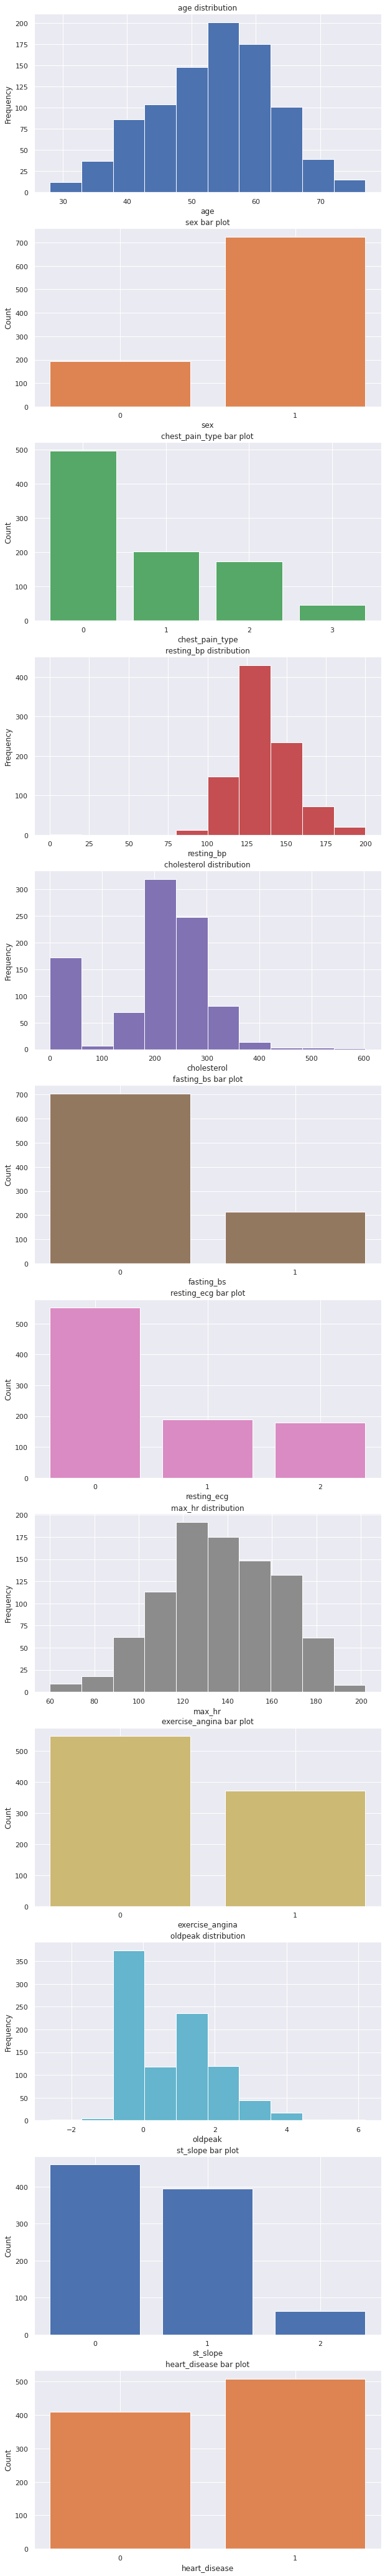

In [71]:
fig, ax = plt.subplots(nrows=len(df.columns))
fig.set_size_inches((10,75))

for idx, column in enumerate(df.columns):
    
    if column in categorical_columns:
        ax[idx].bar(x=df[column].value_counts().index, height=df[column].value_counts().values, color=colors[idx])
        ax[idx].set_title(f"{column} bar plot")
        ax[idx].set_xlabel(column)
        ax[idx].set_ylabel("Count")
        ax[idx].set_xticks(range(len(df[column].value_counts().index)))
    else:
        ax[idx].hist(df[column], color=colors[idx])
        ax[idx].set_title(f"{column} distribution")
        ax[idx].set_xlabel(column)
        ax[idx].set_ylabel("Frequency")
        
plt.show()

Plotting some boxplots of numerical columns to check if there are some outliers

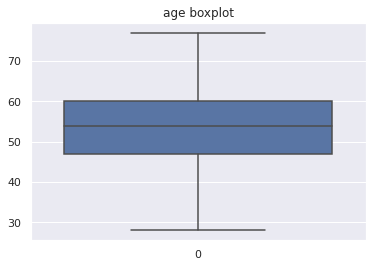

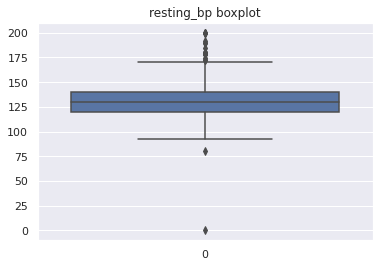

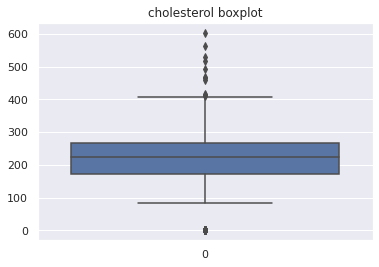

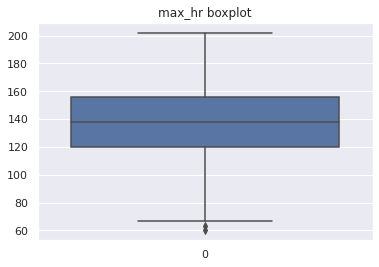

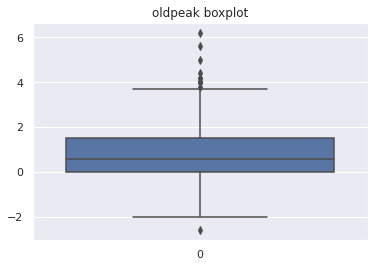

In [72]:
for column in df.columns:
    
    if column not in categorical_columns:
        sns.boxplot(data=df[column])
        plt.title(f"{column} boxplot")    
    plt.show()

Removing the rows where the **cholesterol** and the **resting_bp** is equal to zero.

In [73]:
df = df[~(df.cholesterol == 0)].copy()
df = df[~(df.resting_bp == 0)].copy()

Plotting the correlation matrix of the columns

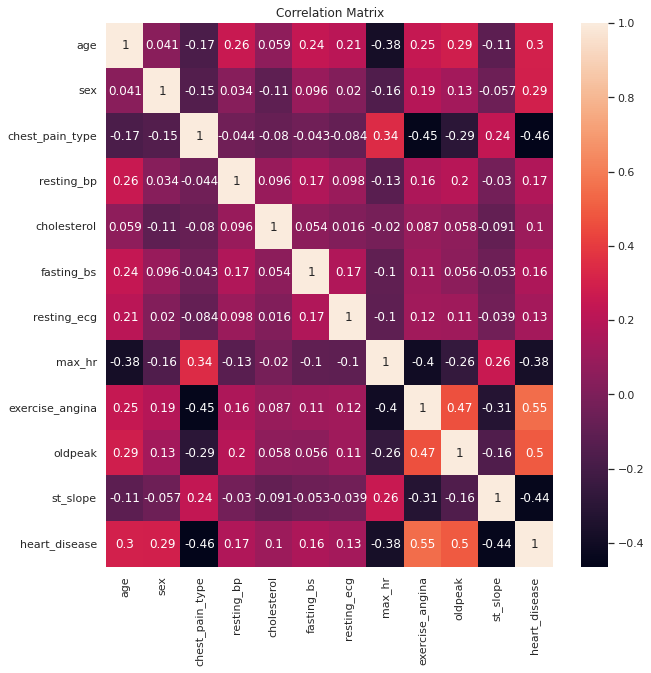

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches((10,10))

ax = sns.heatmap(data=df.corr(), annot=True)
ax.set_title("Correlation Matrix")
plt.show()

A bar plot of the correlation of the columns with the target column (heart_disease)

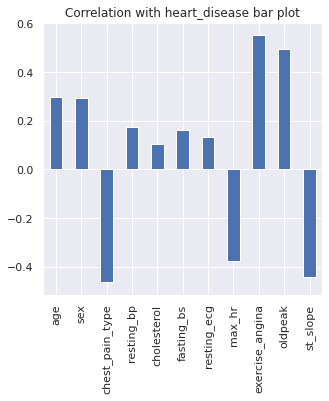

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches((5,5))

ax = df.drop("heart_disease", axis=1).corrwith(df.heart_disease).plot(kind="bar")
ax.set_title("Correlation with heart_disease bar plot")
plt.show()

Calculating the feature importance using AUCARACY score of the columns

In [76]:
data = df.copy()

COLUMNS = [col for col in data.columns if col != "heart_disease"]
TARGET = "heart_disease"

train_size = 0.6
test_size = 0.2
val_size = 0.2

X_full_train, X_test, y_full_train, y_test = train_test_split(data[COLUMNS],
                                                         data[TARGET],
                                                         test_size=test_size,
                                                         random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train,
                                                  y_full_train,
                                                  test_size=val_size/(train_size+test_size),
                                                  random_state=42)

features_auc_scores = []

for column in COLUMNS:
    
    auc_score = roc_auc_score(y_true=y_train, y_score=X_train[column])
    features_auc_scores.append([column, auc_score])
    
feature_importance_df = pd.DataFrame(data=features_auc_scores, columns=["feature", "auc_score"])
feature_importance_df["correlation"] = data.drop("heart_disease", axis=1).corrwith(data.heart_disease).values

A table with **auc_score** and correlation with **heart_disease** of each column in the dataset

In [77]:
feature_importance_df.sort_values("auc_score", ascending=False)

,feature,auc_score,correlation
8,exercise_angina,0.784142,0.551834
9,oldpeak,0.768320,0.495696
0,age,0.654454,0.298617
3,resting_bp,0.617774,0.173242
1,sex,0.613242,0.292779
6,resting_ecg,0.566400,0.132872
4,cholesterol,0.553046,0.103866
5,fasting_bs,0.549722,0.160594
7,max_hr,0.272872,-0.377212
10,st_slope,0.243454,-0.441972


Choosing the features that will be added in the model

In [78]:
logistic_reg = LogisticRegression(solver="liblinear", C=1.0, max_iter=100, random_state=42)

In [79]:
FEATURES = ["exercise_angina", "oldpeak", "age", "sex", "chest_pain_type", "st_slope", "fasting_bs"]

train_size = 0.6
test_size = 0.2
val_size = 0.2

X_full_train, X_test, y_full_train, y_test = train_test_split(data[FEATURES],
                                                            data[TARGET],
                                                            test_size=test_size,
                                                            random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train,
                                                    y_full_train,
                                                    test_size=val_size/(train_size+test_size),
                                                    random_state=42)

dv = DictVectorizer(sparse=False)

full_train_dict = X_full_train.to_dict(orient="records")
train_dict = X_train.to_dict(orient="records")
test_dict = X_test.to_dict(orient="records")
val_dict = X_val.to_dict(orient="records")

X_full_train = dv.fit_transform(full_train_dict)
X_train = dv.fit_transform(train_dict)
X_test = dv.fit_transform(test_dict)
X_val = dv.fit_transform(val_dict)

logistic_reg.fit(X=X_train, y=y_train)

y_pred = logistic_reg.predict(X=X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

86.35789093535571


ValueError: ignored

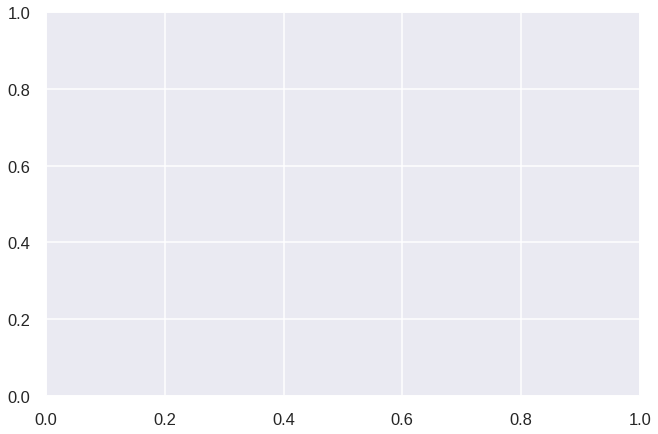

In [145]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

# 1. Logistic Regression

**1.1 Train and Validation Data**

Hyperparameter tunning

In [80]:
c_values = [0.01, 0.1, 0.5, 1.0, 1.5, 10, 100]

for C in c_values:

    logistic_reg = LogisticRegression(solver="liblinear", C=C, max_iter=100, random_state=42)
    logistic_reg.fit(X=X_train, y=y_train)
    y_pred = logistic_reg.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"C: {C} | score: {auc_score*100}")

C: 0.01 | score: 81.74431202600215
C: 0.1 | score: 83.73058866016613
C: 0.5 | score: 86.35789093535571
C: 1.0 | score: 86.35789093535571
C: 1.5 | score: 86.35789093535571
C: 10 | score: 84.94944023113035
C: 100 | score: 84.94944023113035


In [81]:
logistic_reg = LogisticRegression(solver="liblinear", C=0.5, max_iter=100, random_state=42)
logistic_reg.fit(X=X_train, y=y_train)
y_pred = logistic_reg.predict(X=X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

86.35789093535571


**Confusion Matrix**

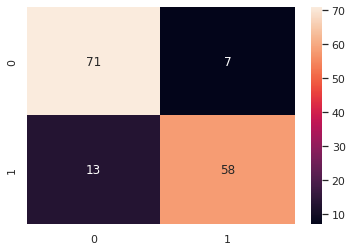

In [82]:
sns.heatmap(confusion_matrix(y_true=y_val, y_pred=y_pred), annot=True)
plt.show()

**Classification Report**

In [83]:

print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        78
           1       0.89      0.82      0.85        71

    accuracy                           0.87       149
   macro avg       0.87      0.86      0.86       149
weighted avg       0.87      0.87      0.87       149



ROC Curve

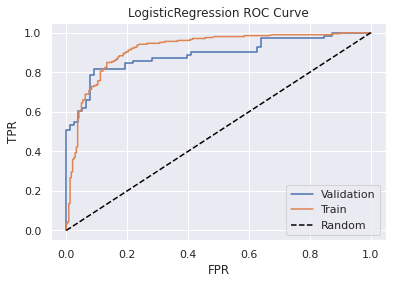

In [84]:
plot_roc_curve(model=logistic_reg, 
               data1=(X_val, y_val), 
               data1_label="Validation",
               data2=(X_train, y_train),
               data2_label="Train",
               title="LogisticRegression ROC Curve")

#2.  Decision Tree Classifier

**2.1. Train and Validation Data**

In [85]:

dt = DecisionTreeClassifier(random_state=42)

In [86]:
dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
y_pred = dt.predict(X=X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

81.04008667388949


Hyperparemeters tunning

In [88]:
criterion_list = ["gini", "entropy"]

for criterion in criterion_list:
    
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt.fit(X=X_train, y=y_train)
    y_pred = dt.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"criterion: {criterion} | score: {auc_score}")

criterion: gini | score: 0.8104008667388949
criterion: entropy | score: 0.755958829902492


In [89]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,15,20,25,50,100,200]

for max_depth in max_depth_list:
    
    dt = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
    dt.fit(X=X_train, y=y_train)
    y_pred = dt.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"max_depth: {max_depth} | score: {auc_score}")

max_depth: 1 | score: 0.7463885879378839
max_depth: 2 | score: 0.8077825929938606
max_depth: 3 | score: 0.8584326471650415
max_depth: 4 | score: 0.8366738894907908
max_depth: 5 | score: 0.8097688696280245
max_depth: 6 | score: 0.8232213795594077
max_depth: 7 | score: 0.8085048754062838
max_depth: 8 | score: 0.8232213795594077
max_depth: 9 | score: 0.8161791260382809
max_depth: 10 | score: 0.7892741061755146
max_depth: 15 | score: 0.8104008667388949
max_depth: 20 | score: 0.8104008667388949
max_depth: 25 | score: 0.8104008667388949
max_depth: 50 | score: 0.8104008667388949
max_depth: 100 | score: 0.8104008667388949
max_depth: 200 | score: 0.8104008667388949


In [90]:
min_samples_leaf_list = [1,2,3,4,5,6,7,8,9,10,15,20,25,50,100,200]

for min_samples_leaf in min_samples_leaf_list:
    
    dt = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X=X_train, y=y_train)
    y_pred = dt.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"min_samples_leaf: {min_samples_leaf} | score: {auc_score}")

min_samples_leaf: 1 | score: 0.8584326471650415
min_samples_leaf: 2 | score: 0.8584326471650415
min_samples_leaf: 3 | score: 0.8584326471650415
min_samples_leaf: 4 | score: 0.8584326471650415
min_samples_leaf: 5 | score: 0.8584326471650415
min_samples_leaf: 6 | score: 0.8584326471650415
min_samples_leaf: 7 | score: 0.8315276273022751
min_samples_leaf: 8 | score: 0.8315276273022751
min_samples_leaf: 9 | score: 0.8315276273022751
min_samples_leaf: 10 | score: 0.8315276273022751
min_samples_leaf: 15 | score: 0.8379378837125316
min_samples_leaf: 20 | score: 0.8263813651137595
min_samples_leaf: 25 | score: 0.8263813651137595
min_samples_leaf: 50 | score: 0.8077825929938606
min_samples_leaf: 100 | score: 0.7463885879378839
min_samples_leaf: 200 | score: 0.8033586132177681


In [91]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=1, random_state=42)
dt.fit(X=X_train, y=y_train)
y_pred = dt.predict(X=X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

85.84326471650415


**Confusion matrix**

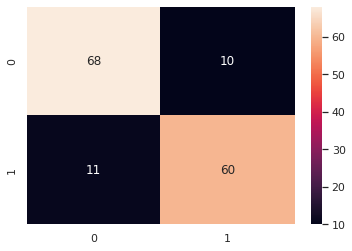

In [92]:
sns.heatmap(confusion_matrix(y_true=y_val, y_pred=y_pred), annot=True)
plt.show()

**Classification report**

In [93]:

print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        78
           1       0.86      0.85      0.85        71

    accuracy                           0.86       149
   macro avg       0.86      0.86      0.86       149
weighted avg       0.86      0.86      0.86       149



**ROC curve**

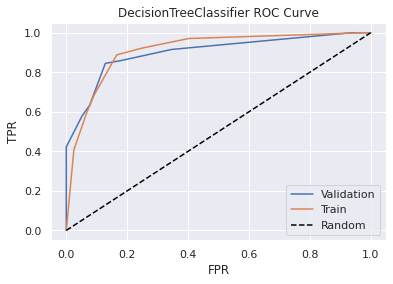

In [94]:
plot_roc_curve(model=dt, 
               data1=(X_val, y_val), 
               data1_label="Validation",
               data2=(X_train, y_train),
               data2_label="Train",
               title="DecisionTreeClassifier ROC Curve")

**2.2. Full Train and Test Data**

In [95]:

dt = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=1, random_state=42)
dt.fit(X=X_full_train, y=y_full_train)
y_pred = dt.predict(X=X_test)
auc_score = roc_auc_score(y_true=y_test.values, y_score=y_pred)
print(auc_score*100)

90.00713139597076


**Confusion matrix**

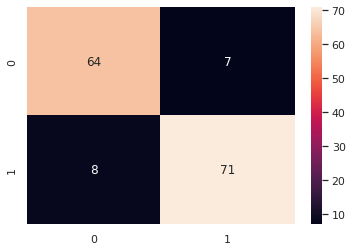

In [96]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True)
plt.show()

In [97]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        71
           1       0.91      0.90      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



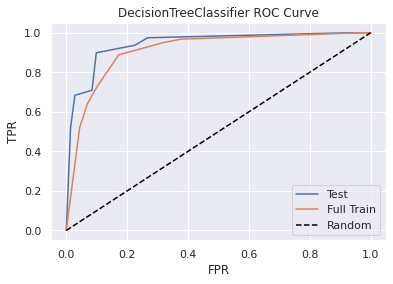

In [98]:
plot_roc_curve(model=dt, 
               data1=(X_test, y_test), 
               data1_label="Test",
               data2=(X_full_train, y_full_train),
               data2_label="Full Train",
               title="DecisionTreeClassifier ROC Curve")

#3. Random Forest Classifier

**3.1. Train and Validation Data**

In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [100]:
rf.fit(X=X_train, y=y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [101]:
y_pred = rf.predict(X=X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

83.02636330805345


**Hyperparameters tunning**

In [102]:
criterion_list = ["gini", "entropy"]

for criterion in criterion_list:
    
    rf = RandomForestClassifier(n_estimators=100, criterion=criterion, random_state=42, n_jobs=-1)
    rf.fit(X=X_train, y=y_train)
    y_pred = rf.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"criterion: {criterion} | score: {auc_score*100}")
    

criterion: gini | score: 83.02636330805345
criterion: entropy | score: 84.30841459010472


In [103]:
n_estimators_list = [1, 5, 10, 25, 50, 75, 100, 250, 500, 1000, 2000]

for n_estimator in n_estimators_list:
    
    rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=5, criterion="entropy", random_state=42, n_jobs=-1)
    rf.fit(X=X_train, y=y_train)
    y_pred = rf.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"n_estimator: {n_estimator} | score: {auc_score}")

n_estimator: 1 | score: 0.7963163596966414
n_estimator: 5 | score: 0.8373058866016613
n_estimator: 10 | score: 0.8565366558324304
n_estimator: 25 | score: 0.8366738894907908
n_estimator: 50 | score: 0.8507583965330444
n_estimator: 75 | score: 0.8507583965330444
n_estimator: 100 | score: 0.8507583965330444
n_estimator: 250 | score: 0.8507583965330444
n_estimator: 500 | score: 0.8507583965330444
n_estimator: 1000 | score: 0.8507583965330444
n_estimator: 2000 | score: 0.8507583965330444


In [104]:
max_depth_list = [1,2,3,4,5,10,15,20,25,50,75,100,200]

for max_depth in max_depth_list:
    
    rf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=max_depth, random_state=42, n_jobs=-1)
    rf.fit(X=X_train, y=y_train)
    y_pred = rf.predict(X=X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"max_depth: {max_depth} | score: {auc_score}")

max_depth: 1 | score: 0.8424521487901768
max_depth: 2 | score: 0.8180751173708921
max_depth: 3 | score: 0.8373058866016613
max_depth: 4 | score: 0.844348140122788
max_depth: 5 | score: 0.8565366558324304
max_depth: 10 | score: 0.8308956301914049
max_depth: 15 | score: 0.8161791260382809
max_depth: 20 | score: 0.8232213795594077
max_depth: 25 | score: 0.8232213795594077
max_depth: 50 | score: 0.8232213795594077
max_depth: 75 | score: 0.8232213795594077
max_depth: 100 | score: 0.8232213795594077
max_depth: 200 | score: 0.8232213795594077


In [105]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=5, max_features="sqrt", random_state=42, n_jobs=-1)
rf.fit(X=X_train, y=y_train)
y_pred = rf.predict(X=X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score)

0.8565366558324304


**Confusion matrix**

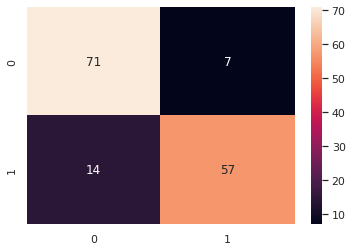

In [106]:
sns.heatmap(confusion_matrix(y_true=y_val, y_pred=y_pred), annot=True)
plt.show()

**Classification Report**

In [107]:
print(classification_report(y_true=y_val, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87        78
           1       0.89      0.80      0.84        71

    accuracy                           0.86       149
   macro avg       0.86      0.86      0.86       149
weighted avg       0.86      0.86      0.86       149



**ROC Curve**

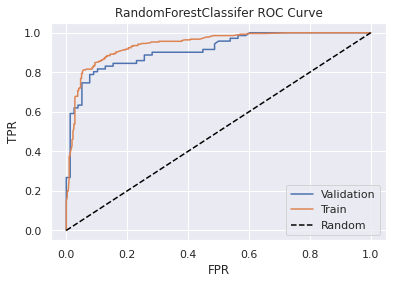

In [108]:

plot_roc_curve(model=rf, 
               data1=(X_val, y_val), 
               data1_label="Validation",
               data2=(X_full_train, y_full_train),
               data2_label="Train",
               title="RandomForestClassifer ROC Curve")

**3.2. Full Train and Test Data**

In [109]:
rf = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=5, max_features="sqrt", random_state=42, n_jobs=-1)
rf.fit(X=X_full_train, y=y_full_train)
y_pred = rf.predict(X=X_test)
auc_score_rfc = roc_auc_score(y_true=y_test.values, y_score=y_pred)
print(auc_score_rfc*100)

86.35229096095561


**Confusion Matrix**

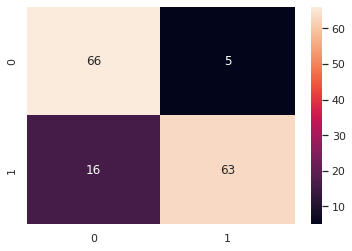

In [110]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True)
plt.show()

**Classification Report**

In [111]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        71
           1       0.93      0.80      0.86        79

    accuracy                           0.86       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.86      0.86       150



**ROC Curve**

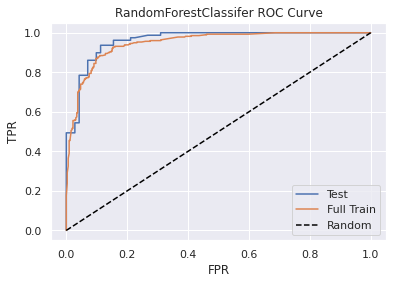

In [112]:
plot_roc_curve(model=rf, 
               data1=(X_test, y_test), 
               data1_label="Test",
               data2=(X_full_train, y_full_train),
               data2_label="Full Train",
               title="RandomForestClassifer ROC Curve")

#4. XGB Classifier

**4.1. Train and Validation Data**

In [113]:
xgb_cl = xgb.XGBClassifier()

In [114]:
xgb_cl.fit(X_train, y_train)

XGBClassifier()

In [115]:
y_pred = xgb_cl.predict(X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

82.96316359696641


**Hyperparameters Tunning**

In [116]:
n_estimators_list = [1, 5, 10, 15, 20, 25, 50, 100, 200, 500, 1000, 2000]

for n_estimator in n_estimators_list:
    
    xgb_cl = xgb.XGBClassifier(objective="binary:logistic", 
                           n_estimators = n_estimator
                           )
    xgb_cl.fit(X_train, y_train)
    y_pred = xgb_cl.predict(X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"n_estimator: {n_estimator} | score: {auc_score}")

n_estimator: 1 | score: 0.8584326471650415
n_estimator: 5 | score: 0.8584326471650415
n_estimator: 10 | score: 0.8584326471650415
n_estimator: 15 | score: 0.844348140122788
n_estimator: 20 | score: 0.844348140122788
n_estimator: 25 | score: 0.8437161430119177
n_estimator: 50 | score: 0.8437161430119177
n_estimator: 100 | score: 0.829631635969664
n_estimator: 200 | score: 0.8488624052004333
n_estimator: 500 | score: 0.8219573853376669
n_estimator: 1000 | score: 0.8085048754062838
n_estimator: 2000 | score: 0.8155471289274105


In [117]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,20,50]

for max_depth in max_depth_list:
    
    xgb_cl = xgb.XGBClassifier(objective="binary:logistic", 
                           n_estimators = 5,
                           max_depth=max_depth
                           )
    xgb_cl.fit(X_train, y_train)
    y_pred = xgb_cl.predict(X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"max_depth: {max_depth} | score: {auc_score}")

max_depth: 1 | score: 0.7463885879378839
max_depth: 2 | score: 0.8077825929938606
max_depth: 3 | score: 0.8584326471650415
max_depth: 4 | score: 0.8308956301914049
max_depth: 5 | score: 0.7892741061755146
max_depth: 6 | score: 0.7892741061755146
max_depth: 7 | score: 0.7892741061755146
max_depth: 8 | score: 0.7892741061755146
max_depth: 9 | score: 0.7892741061755146
max_depth: 10 | score: 0.7892741061755146
max_depth: 20 | score: 0.7892741061755146
max_depth: 50 | score: 0.7892741061755146


In [118]:
learning_rate_list = [0.3, 0.29, 0.28, 0.27, 0.26, 0.25, 0.2, 0.15, 0.1, 0.01]

for lr in learning_rate_list:
    
    xgb_cl = xgb.XGBClassifier(objective="binary:logistic", 
                           learning_rate=lr,
                           n_estimators=5,
                           max_depth=6
                           )
    xgb_cl.fit(X_train, y_train)
    y_pred = xgb_cl.predict(X_val)
    auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
    print(f"learning rate: {lr} | score: {auc_score}")

learning rate: 0.3 | score: 0.8437161430119177
learning rate: 0.29 | score: 0.8232213795594077
learning rate: 0.28 | score: 0.8513903936439148
learning rate: 0.27 | score: 0.8513903936439148
learning rate: 0.26 | score: 0.8373058866016613
learning rate: 0.25 | score: 0.8373058866016613
learning rate: 0.2 | score: 0.8373058866016613
learning rate: 0.15 | score: 0.8033586132177681
learning rate: 0.1 | score: 0.7892741061755146
learning rate: 0.01 | score: 0.7764535933550019


In [119]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", 
                           learning_rate=0.27,
                           n_estimators=5,
                           max_depth=6
                           )

In [120]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(learning_rate=0.27, max_depth=6, n_estimators=5)

In [121]:
y_pred = xgb_cl.predict(X_val)
auc_score = roc_auc_score(y_true=y_val.values, y_score=y_pred)
print(auc_score*100)

85.13903936439148


**Confusion Matrix**

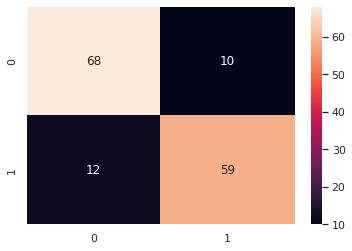

In [122]:
sns.heatmap(confusion_matrix(y_true=y_val, y_pred=y_pred), annot=True)
plt.show()

**Classification Report**

In [123]:
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        78
           1       0.86      0.83      0.84        71

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149



**ROC Curve**

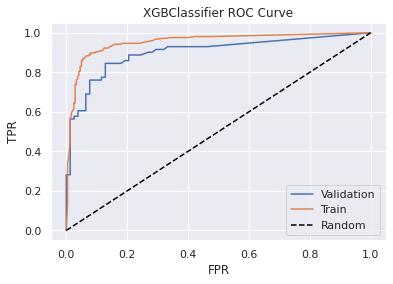

In [124]:
plot_roc_curve(model=xgb_cl, 
               data1=(X_val, y_val), 
               data1_label="Validation",
               data2=(X_train, y_train),
               data2_label="Train",
               title="XGBClassifier ROC Curve")

**4.2. Full Train and Test Data**

In [125]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", 
                           learning_rate=0.27,
                           n_estimators=5,
                           max_depth=6
                           )
xgb_cl.fit(X_full_train, y_full_train)
y_pred = xgb_cl.predict(X_test)
auc_score = roc_auc_score(y_true=y_test.values, y_score=y_pred)
print(auc_score*100)

86.91388839365305


**Confusion matrix**

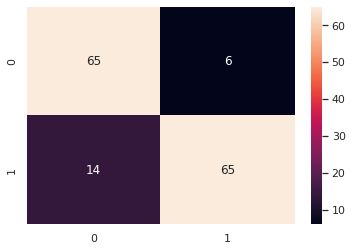

In [126]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True)
plt.show()

**Classification Report**

In [127]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        71
           1       0.92      0.82      0.87        79

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



**ROC Curve**

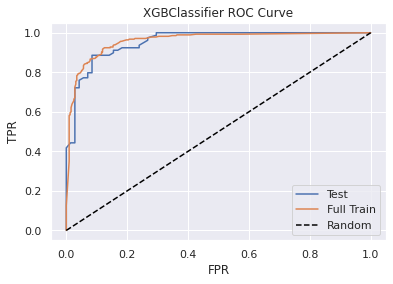

In [128]:
plot_roc_curve(model=xgb_cl, 
               data1=(X_test, y_test), 
               data1_label="Test",
               data2=(X_full_train, y_full_train),
               data2_label="Full Train",
               title="XGBClassifier ROC Curve")

#5. K Value Estimation

In [129]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.22
2 0.24666666666666667
3 0.18
4 0.21333333333333335
5 0.15333333333333332
6 0.16666666666666666
7 0.17333333333333334
8 0.18666666666666668
9 0.17333333333333334
10 0.22
11 0.18
12 0.20666666666666667
13 0.18666666666666668
14 0.19333333333333333
15 0.2
16 0.22666666666666666
17 0.22
18 0.22
19 0.21333333333333335
20 0.22
21 0.22
22 0.25333333333333335
23 0.24
24 0.26
25 0.24666666666666667
26 0.24666666666666667
27 0.24
28 0.24666666666666667
29 0.23333333333333334
30 0.26
31 0.24
32 0.24666666666666667
33 0.24666666666666667
34 0.24
35 0.24
36 0.24
37 0.22666666666666666
38 0.24
39 0.24


Text(0, 0.5, 'Error Rate')

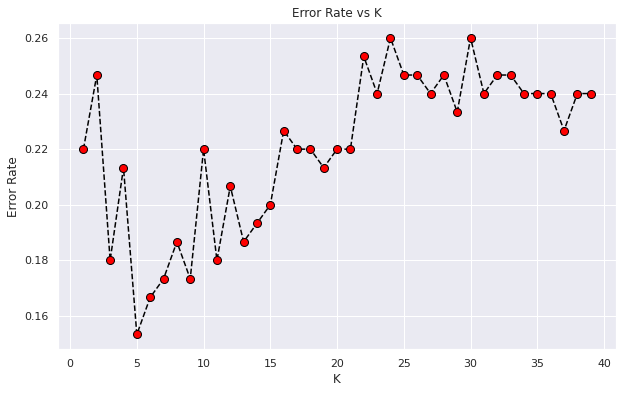

In [130]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

#6. KNN Model

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        71
           1       0.83      0.68      0.75        79

    accuracy                           0.76       150
   macro avg       0.77      0.76      0.76       150
weighted avg       0.77      0.76      0.76       150



------------------------
Confusion Matrix
------------------------

[[60 11]
 [25 54]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


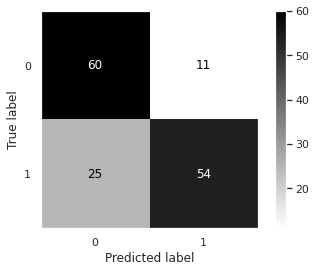

In [131]:
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

#7. Support Vector Classifier

              precision    recall  f1-score   support

           0       0.65      0.80      0.72        71
           1       0.77      0.61      0.68        79

    accuracy                           0.70       150
   macro avg       0.71      0.71      0.70       150
weighted avg       0.71      0.70      0.70       150



------------------------
Confusion Matrix
------------------------

[[57 14]
 [31 48]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


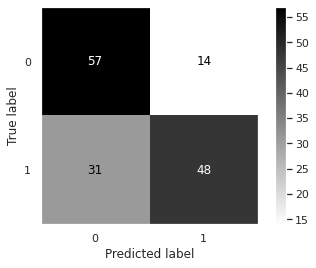

In [143]:
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

# 8. Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        71
           1       0.92      0.89      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150


------------------------
Confusion Matrix
------------------------

[[65  6]
 [ 9 70]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


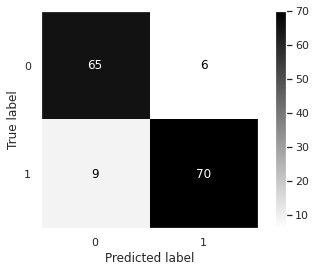

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=23)
clff.fit(X_train, y_train)
y_pred=clff.predict(X_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clff, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

# 9. Naive Bayes Algorithm

In [134]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [135]:
Y_pred_nb.shape

(150,)

In [136]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 82.67 %
